In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
amazon_books = pd.read_csv(r'C:\Users\ASUS\Downloads\archive (7)\bestsellers with categories.csv')

In [3]:
#missing values
amazon_books.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

checking the data, set we see that there are no missing values

In [4]:
amazon_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Data frame has 550 rows ans 6 columns

In [5]:
amazon_books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Average rating for the data frame is 4.6 with the highest of 4.9 and the lowest review of 3.3 stars. The average price of books in the data frame is $13, with the highest and lowest prices of $105 and $0, respectively.

In [6]:
#For total number of different books
len(amazon_books.Name.unique())

351

Data Frame has a total number of 550 rows but with 351 names. This clearly indicates that a few books a repeatedly in the best seller list for different years.

In [7]:
amazon_books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [8]:
#top books according to category
amazon_books_sorted = amazon_books.sort_values("Genre", ascending= False)
amazon_books_sorted

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction
307,StrengthsFinder 2.0,Gallup,4.0,5069,17,2012,Non Fiction
306,StrengthsFinder 2.0,Gallup,4.0,5069,17,2011,Non Fiction
...,...,...,...,...,...,...,...
77,Divergent / Insurgent,Veronica Roth,4.5,17684,6,2014,Fiction
76,Divergent,Veronica Roth,4.6,27098,15,2014,Fiction
75,Divergent,Veronica Roth,4.6,27098,15,2013,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


In [9]:
top_priced_books = amazon_books[['Name', 'Price', 'Year']]
top_priced_books

,Name,Price,Year
0,10-Day Green Smoothie Cleanse,8,2016
1,11/22/63: A Novel,22,2011
2,12 Rules for Life: An Antidote to Chaos,15,2018
3,1984 (Signet Classics),6,2017
4,"5,000 Awesome Facts (About Everything!) (Natio...",12,2019
...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),8,2019
546,You Are a Badass: How to Stop Doubting Your Gr...,8,2016
547,You Are a Badass: How to Stop Doubting Your Gr...,8,2017
548,You Are a Badass: How to Stop Doubting Your Gr...,8,2018


In [10]:
top_priced_books_sorted_desc= top_priced_books.sort_values('Price', ascending=False)
top_priced_books_sorted_desc

,Name,Price,Year
69,Diagnostic and Statistical Manual of Mental Di...,105,2013
70,Diagnostic and Statistical Manual of Mental Di...,105,2014
473,The Twilight Saga Collection,82,2009
151,Hamilton: The Revolution,54,2016
346,The Book of Basketball: The NBA According to T...,53,2009
...,...,...,...
116,Frozen (Little Golden Book),0,2014
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",0,2013
505,To Kill a Mockingbird,0,2013
506,To Kill a Mockingbird,0,2014


In [11]:
most_reviewed_books = amazon_books[['Name', 'Reviews']]
most_reviewed_books

,Name,Reviews
0,10-Day Green Smoothie Cleanse,17350
1,11/22/63: A Novel,2052
2,12 Rules for Life: An Antidote to Chaos,18979
3,1984 (Signet Classics),21424
4,"5,000 Awesome Facts (About Everything!) (Natio...",7665
...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),9413
546,You Are a Badass: How to Stop Doubting Your Gr...,14331
547,You Are a Badass: How to Stop Doubting Your Gr...,14331
548,You Are a Badass: How to Stop Doubting Your Gr...,14331


In [39]:
most_reviewed_books_sorted_desc= most_reviewed_books.sort_values('Reviews',ascending=False)
most_reviewed_books_sorted_desc

,Name,Reviews
534,Where the Crawdads Sing,87841
382,The Girl on the Train,79446
383,The Girl on the Train,79446
32,Becoming,61133
33,Becoming,61133
...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,440
512,True Compass: A Memoir,438
121,George Washington's Sacred Fire,408
300,Soul Healing Miracles: Ancient and New Sacred ...,220


In [41]:
#top 10 reviewed books
topbooks = most_reviewed_books_sorted_desc.nlargest(10, ['Reviews'])
topbooks

,Name,Reviews
534,Where the Crawdads Sing,87841
382,The Girl on the Train,79446
383,The Girl on the Train,79446
32,Becoming,61133
33,Becoming,61133
137,Gone Girl,57271
135,Gone Girl,57271
136,Gone Girl,57271
368,The Fault in Our Stars,50482
367,The Fault in Our Stars,50482


In [42]:
#book authors
authors = amazon_books['author'].value_counts()
authors = authors.to_frame().reset_index()
authors = authors.head(10)
authors

,index,author
0,Jeff Kinney,12
1,Gary Chapman,11
2,Suzanne Collins,11
3,Rick Riordan,11
4,American Psychological Association,10
5,Gallup,9
6,Dr. Seuss,9
7,Rob Elliott,8
8,Stephenie Meyer,7
9,Bill O'Reilly,7


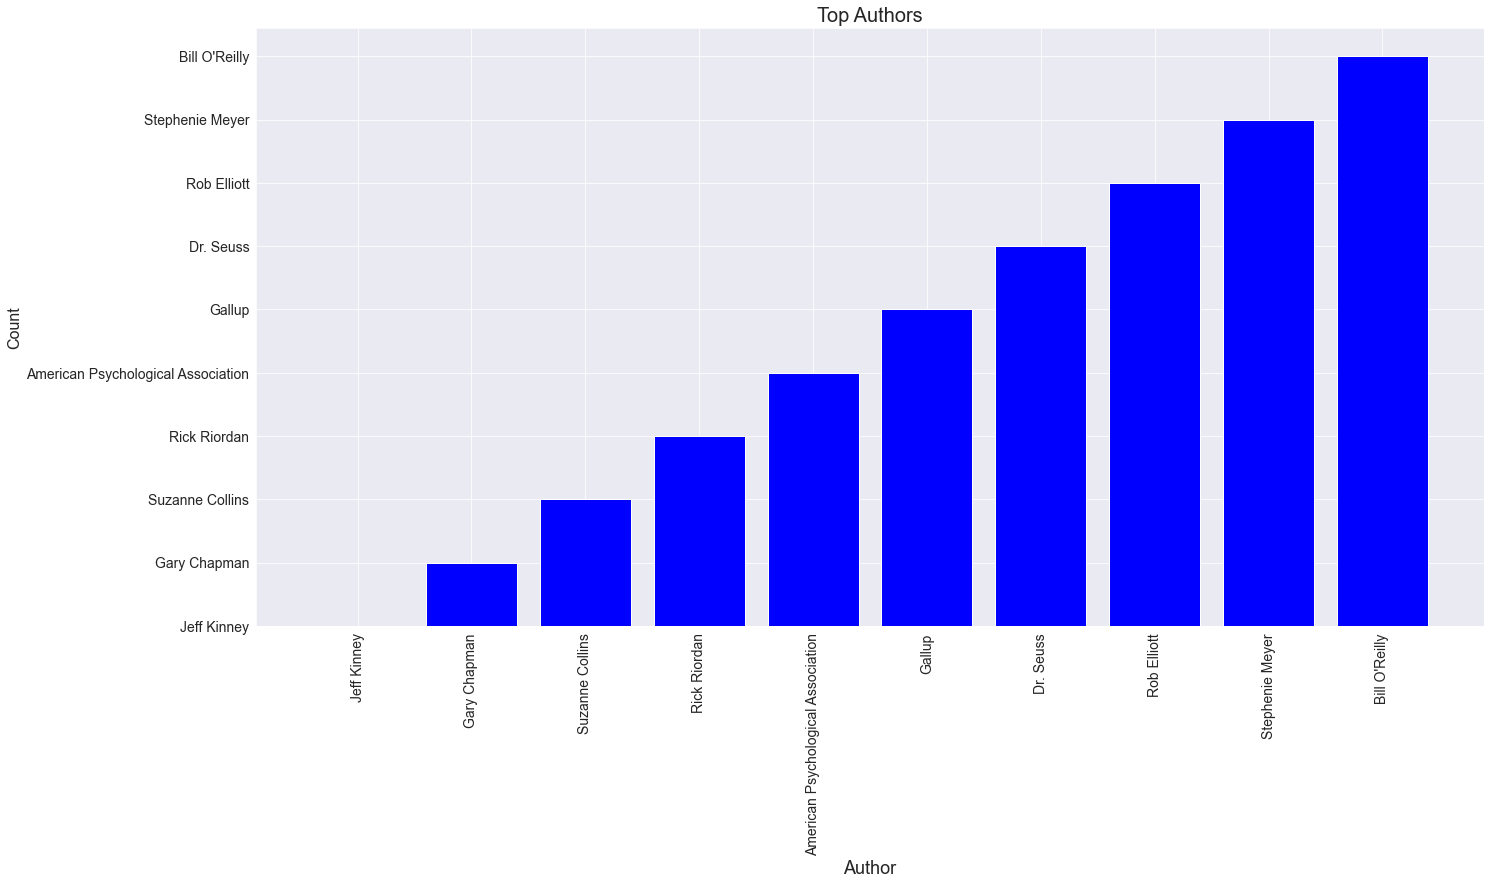

In [43]:
#chart showing authors and number of books they have
fig= plt.figure(figsize=(22, 11))
plt.bar(authors['index'],authors['index'],color='blue')
plt.title('Top Authors', fontsize= 20)
plt.xlabel('Author', fontsize= 18)
plt.ylabel('Count', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Top Authors')


In [12]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

INSIGHTS WE ARE SEEKING TO DERIVE FROM THE DATA SET

This analysis is only valid for the top selling category.

•	Which genre has the most books in this category ?
•	What is the average rating of each genre?
•	What is the popularity of each genre and its relationship with time?
•	Which year had the most books sold in this category?
•	What effect does time had on the price of books over the years?
•	Price of books of each genre over the years.
•	How has been the customer reviews over the years?
•	Which genres have the highest and lowest ratings?
•	Which author is most popular and which have earned the most in this category?
•	Who is the most popular author to each genre?
•	Which books have earned the most money in each genre?
•	The money making books overall.
•	What is the relationship of selling with ratings?


In [13]:
fiction_amazon_books_values= amazon_books[amazon_books.Genre=='Fiction']
len(fiction_amazon_books_values)

240

In [14]:
Nfiction_amazon_books=amazon_books[amazon_books.Genre=='Non Fiction']
len(Nfiction_amazon_books)

310

In [15]:
Genre_dist= amazon_books.Genre.value_counts()
Genre_dist

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

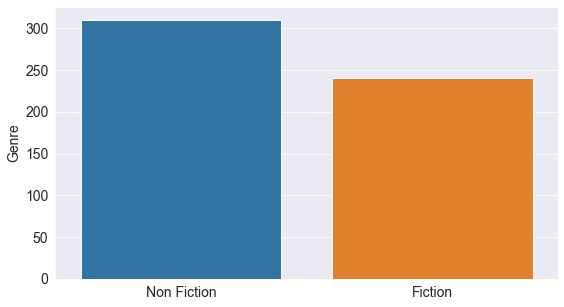

In [16]:
sns.barplot(x=Genre_dist.index,y=Genre_dist);

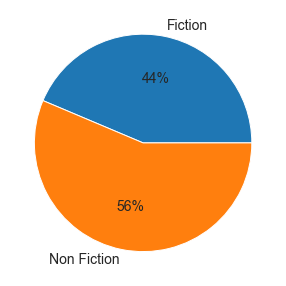

In [17]:
plt.pie([240,310],labels=['Fiction','Non Fiction'],autopct='%.0f%%');

Of the total books that fall under the best sellers list fiction had 240 books with non_fiction having 310 books which is 56% of the best sellers on amazon.

User Ratings Overview:
    
•	What is the average rating of each genre?

In [18]:
amazon_books.groupby('Genre')['User Rating'].mean()

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

In [19]:
#To rename the columns and make it easy to use:
amazon_books.columns=['name','author','user_rating','reviews','price','year','genre']

In [20]:
amazon_books.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


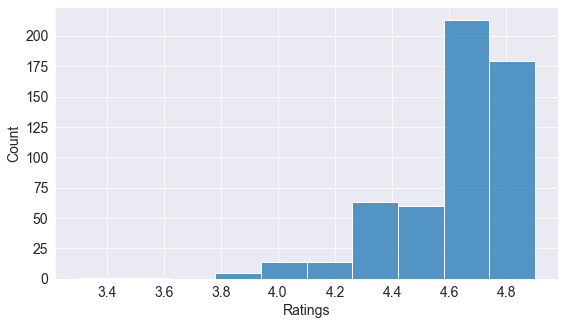

In [21]:
#Distribution of ratings
sns.histplot(data=amazon_books.user_rating,bins=10)
plt.xlabel("Ratings");

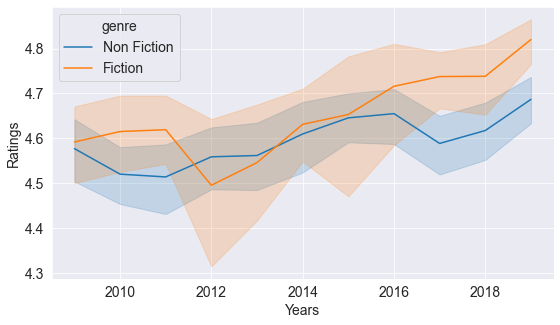

In [22]:
# Relationship of ratings with time.
sns.lineplot(y=amazon_books.user_rating,x=amazon_books.year,hue=amazon_books.genre);
plt.ylabel("Ratings")
plt.xlabel("Years");

Though non-fiction features prominently in the best-sellers list it can be seen in the graph above that fiction consistently had the highest reviews, except for the years 2012 and 2013 of the years under review.

Relationship between ratings and price

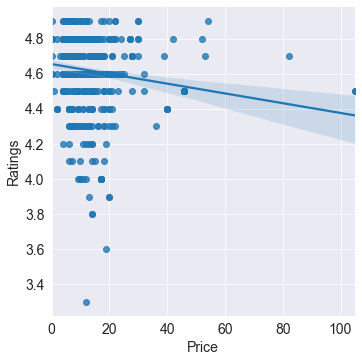

In [23]:
sns.lmplot(y='user_rating',x='price',data= amazon_books)
plt.ylabel('Ratings')
plt.xlabel('Price');

There appears to be a negative relationship bewtween price of books and amount of review stars. As price increases ratings go down, though the realtionship is not significant.

Insight on earnings over the years in review

In [24]:
amazon_books['estimated_profit']=amazon_books.reviews*amazon_books.price

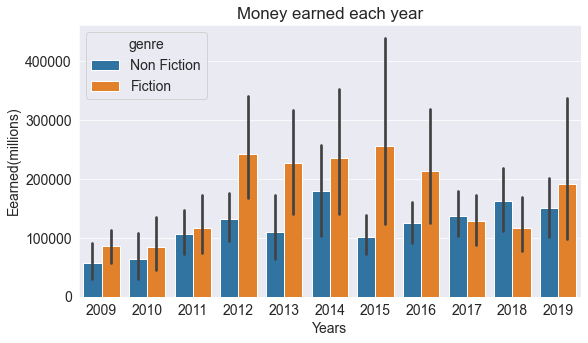

In [25]:
sns.barplot(x=amazon_books.year,y=amazon_books.estimated_profit,hue=amazon_books.genre)
plt.xlabel('Years')
plt.ylabel("Eearned(millions)")
plt.title('Money earned each year');

With the highest reviews, Fiction also returned the highest sales figures, the highest for the period in review being 2012. Having no outliers. 

Average profit on books based on genre

In [26]:
genre_average= amazon_books.groupby(['genre'])['estimated_profit'].mean()

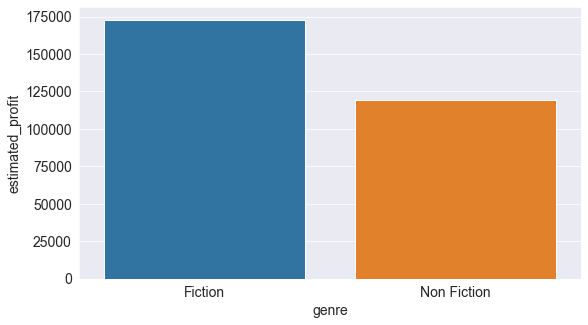

In [27]:
sns.barplot(x=genre_average.index,y=genre_average);

Top 10 earners

In [28]:
top_earners= amazon_books.groupby('name')['estimated_profit'].max()
top_earners= top_earners.sort_values(ascending=False).head(10)
top_earners

name
The Girl on the Train                                                                                 1430028
The Alchemist                                                                                         1396161
Where the Crawdads Sing                                                                               1317615
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5                              701295
Harry Potter Paperback Box Set (Books 1-7)                                                             700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                    676880
Becoming                                                                                               672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)               661710
The Fault in Our Stars                                                                                 656266
A Gam

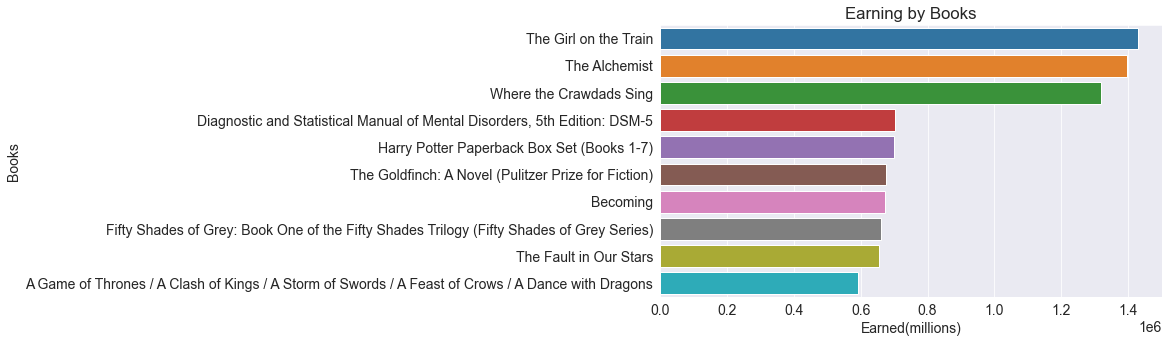

In [29]:
sns.barplot(x=top_earners,y=top_earners.index)
plt.xlabel("Earned(millions)")
plt.ylabel("Books")
plt.title('Earning by Books');

In [30]:
top_earners_per_year= amazon_books[amazon_books.groupby('year')['estimated_profit'].transform(max) == amazon_books['estimated_profit']]
top_earners_per_year

,name,author,user_rating,reviews,price,year,genre,estimated_profit
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,701295
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,661710
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,700492
265,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,458730
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,394680
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,1396161
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction,508470
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction,474768


In [31]:
top_earners_per_year= top_earners_per_year.sort_values('year').set_index('year')
top_earners_per_year

,name,author,user_rating,reviews,price,genre,estimated_profit
year,,,,,,,
2009,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,Non Fiction,394680
2010,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,Non Fiction,474768
2011,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,Fiction,508470
2012,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,Fiction,661710
2013,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,Non Fiction,701295
2014,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction,1396161
2015,The Girl on the Train,Paula Hawkins,4.1,79446,18,Fiction,1430028
2016,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction,700492
2017,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,Fiction,458730


Average earning per genre

In [32]:
genres_per_year_mean=amazon_books.groupby(['year','genre'])['estimated_profit'].mean().round(2)

In [33]:
pd.DataFrame(genres_per_year_mean)

estimated_profit
year genre                        
2009 Fiction              85776.79
     Non Fiction          58024.58
2010 Fiction              84522.00
     Non Fiction          64335.63
2011 Fiction             117434.67
     Non Fiction         106295.21
2012 Fiction             242780.67
     Non Fiction         132104.31
2013 Fiction             226853.71
     Non Fiction         110657.31
2014 Fiction             236487.86
     Non Fiction         179397.71
2015 Fiction             256752.82
     Non Fiction         102435.36
2016 Fiction             213931.84
     Non Fiction         125381.45
2017 Fiction             129188.17
     Non Fiction         137256.88
2018 Fiction             117636.00
     Non Fiction         162524.79
2019 Fiction             191812.50
     Non Fiction         150023.50

Trend of best sellers (Top Rated) over the years

In [34]:
Earning_Graph= amazon_books.groupby('year')['estimated_profit'].sum()

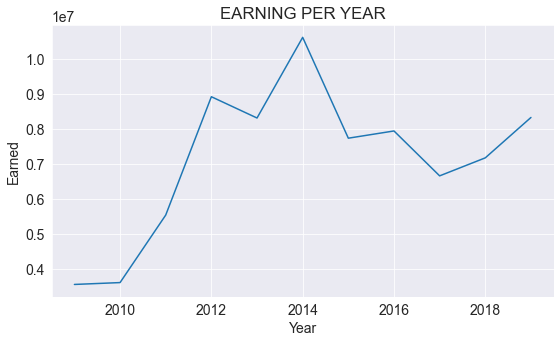

<Figure size 864x864 with 0 Axes>

In [35]:
sns.lineplot(data=Earning_Graph)
plt.xlabel('Year')
plt.ylabel("Earned")
plt.title("EARNING PER YEAR")
plt.figure(figsize=(12,12));

The highest income earned was in 2014, while amazon earned the least in the years preceeding 2010

Top 5 authors with the highest earnings

In [36]:
authors= amazon_books.groupby('author')['estimated_profit'].sum()


In [37]:
authors=authors.sort_values(ascending=False).head(10)
authors

author
American Psychological Association    3946800
Suzanne Collins                       3368646
E L James                             2517303
John Green                            2381609
Laura Hillenbrand                     2284821
Paula Hawkins                         1986150
Gillian Flynn                         1660859
Gary Chapman                          1516167
Dr. Seuss                             1423598
American Psychiatric Association      1402590
Name: estimated_profit, dtype: int64

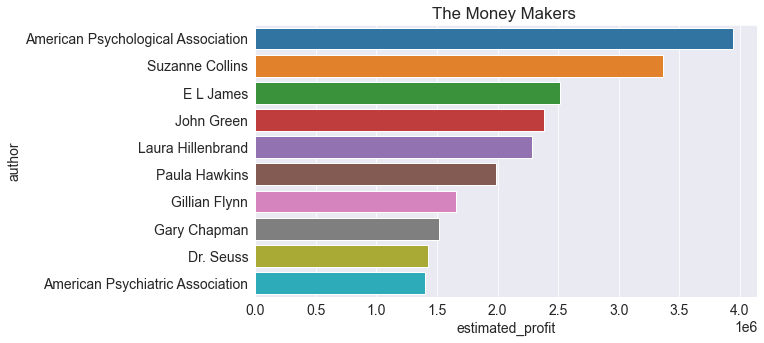

In [38]:
sns.barplot(y=authors.index,x=authors)
plt.title('The Money Makers ');